In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-beta0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.0
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()


In [3]:
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_valid_std = std.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_train_std = std.transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

In [6]:
def show_images(n_rows,n_cols,x_data,y_data,classnames):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(classnames[y_data[index]])
    plt.show()
classnames = ['T-shirt','Trouser','pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层 full connect layer
for i in range(20):
    model.add(keras.layers.Dense(300,activation="relu"))
    model.add(keras.layers.BatchNormalization())
    """
    批归一化在激活函数之前
    model.add(keras.layers.dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    """
# 全连接层 full connect layer
model.add(keras.layers.Dense(10,activation="softmax"))
# relu； y = max(0,x)
# softmax: 将向量转换为概率分布
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1

In [9]:
# 创建保存模型路径
logdir = '.\dnn-bn-callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "\\fashion_mnist_model.h5")
callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
             keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),]

history = model.fit(x_train_std,y_train,epochs=10,
                    validation_data=(x_valid_std,y_valid),
                    callbacks=callbacks)

W0828 10:21:20.947156  4268 deprecation.py:323] From d:\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0828 10:21:37.723052  4268 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.207954). Check your callbacks.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 24s 436us/sample - loss: 0.9556 - accuracy: 0.6619 - val_loss: 0.6176 - val_accuracy: 0.7728
Epoch 2/10
55000/55000 [==============================] - 22s 391us/sample - loss: 0.6667 - accuracy: 0.7625 - val_loss: 0.4949 - val_accuracy: 0.8310
Epoch 3/10
55000/55000 [==============================] - 22s 401us/sample - loss: 0.5641 - accuracy: 0.8012 - val_loss: 0.4153 - val_accuracy: 0.8514
Epoch 4/10
55000/55000 [==============================] - 22s 397us/sample - loss: 0.5173 - accuracy: 0.8184 - val_loss: 0.4245 - val_accuracy: 0.8408
Epoch 5/10
55000/55000 [==============================] - 22s 394us/sample - loss: 0.4715 - accuracy: 0.8325 - val_loss: 0.3936 - val_accuracy: 0.8650
Epoch 6/10
55000/55000 [==============================] - 22s 393us/sample - loss: 0.4473 - accuracy: 0.8422 - val_loss: 0.3859 - val_accuracy: 0.8562
Epoch 7/10
55000/55000 [=====================

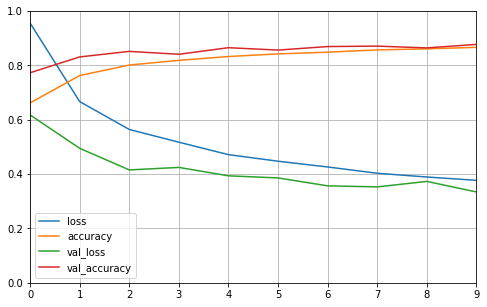

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_test_std = std.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
model.evaluate(x_test_std,y_test)



10000/10000 [==============================] - 1s 133us/sample - loss: 0.3680 - accuracy: 0.8664


[0.3680122898578644, 0.8664]

In [12]:
logdir = './callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)